# Visualización con Seaborn

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib

In [3]:
#instalación 
# !pip install matplotlib
# !pip install seaborn

In [4]:
#actualizar un paquete 
#!pip install matplotlib -U

In [5]:
# #ver las versiones que se tiene instalado 
# print("Matplotlib :", matplotlib.__version__)
# print("sns :", seaborn.__version__)

### Matplotlib vs Seaborn

| Matplotlib | Seaborn |
|:- |:-|
| Matplotlib crea gráficos simples, incluidos gráficos de barras, histogramas, gráficos circulares, diagramas de dispersión, líneas y otras representaciones visuales de datos. | Existen numerosos patrones y gráficos para la visualización de datos en Seaborn. Emplea temas atractivos y ayuda en la integración de todos los datos en un solo gráfico.  |
| Utiliza una sintaxis que es relativamente complicada y extensa. Ejemplo: Matplotlib.pyplot.bar(eje x, eje y) es la sintaxis de un gráfico de barras. | Tiene una sintaxis relativamente simple, por lo que es más fácil de aprender y comprender. Ejemplo: seaborn.barplot(eje x, eje y) sintaxis para un gráfico de barras. | 
|Podemos abrir y trabajar con muchas figuras a la vez. Puede cerrar la figura actual usando la sintaxis matplotlib.pyplot.close().Cierra todas las figuras usando esta sintaxis: matplotlib.pyplot.close(“all”)|Seaborn establece el tiempo para la creación de cada figura. Sin embargo, puede provocar problemas de memoria (OOM).|
|Matplotlib es un paquete de gráficos de Python para la visualización de datos y se integra muy bien con Numpy y Pandas. Pyplot ofrece capacidades y sintaxis similares a las de MATLAB|Seaborn se siente más cómodo con los marcos de datos de Pandas. Utiliza conjuntos simples de técnicas para producir hermosas imágenes en Python.|
|Matplotlib es altamente personalizado y robusto|Con la ayuda de sus temas predeterminados, Seaborn evita tramas superpuestas.|
|Matplotlib traza varios gráficos usando Pandas y Numpy.|Seaborn es la versión extendida de Matplotlib, que usa Matplotlib, Numpy y Pandas para trazar gráficos.|

### Ejemplos comparativos

In [9]:
#Los datos
dataset = sns.load_dataset('iris')
dataset.columns = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "species"]

In [10]:
dataset.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


#### Ejemplo 1. Gráfico de dispersión

$\color{Purple}{\text{Con Matplotlib}}$
 

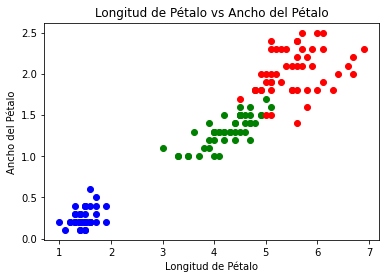

In [11]:
colores = {'setosa': 'b', 'versicolor': 'g', 'virginica': 'r'}
fig,ax = plt.subplots()

plt.title("Longitud de Pétalo vs Ancho del Pétalo")
plt.xlabel("Longitud de Pétalo")
plt.ylabel("Ancho del Pétalo")

# trazar cada punto de datos
for i in range(len(dataset['petal length (cm)'])):    
    # trazando diferentes clases con diferentes colores
    ax.scatter(dataset['petal length (cm)'][i], dataset['petal width (cm)'][i],color=colores[dataset['species'][i]])

$\color{blue}{\text{Con Seaborn}}$

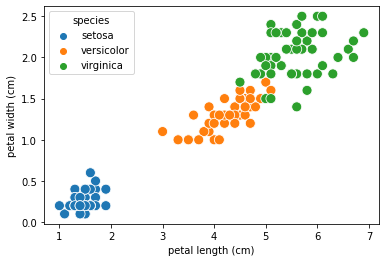

In [12]:
x_axis = dataset['petal length (cm)']
y_axis = dataset['petal width (cm)']
sns.scatterplot(x=x_axis, y=y_axis, hue=dataset.species,s=100)
plt.show()

#### Ejemplo 2. Gráficos de línea

$\color{Purple}{\text{Con Matplotlib}}$

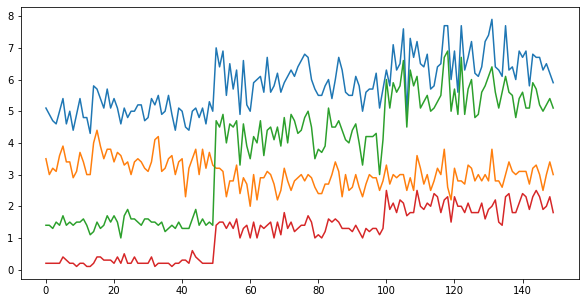

In [13]:
columns = dataset.columns.drop(['species'])
x_data = range(0, dataset.shape[0])
fig, ax = plt.subplots(figsize=(10, 5))
for column in columns:
    ax.plot(x_data, dataset[column])    

$\color{blue}{\text{Con Seaborn}}$

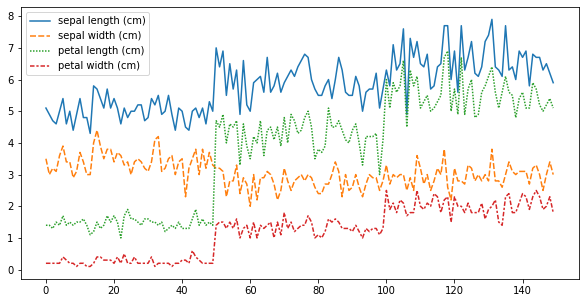

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=dataset)
plt.show()

#### Ejemplo 3. Gráficos de histograma


$\color{Purple}{\text{Con Matplotlib}}$

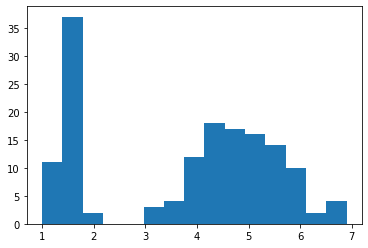

In [15]:
plt.hist(dataset['petal length (cm)'], bins=15)
plt.show()

$\color{blue}{\text{Con Seaborn}}$

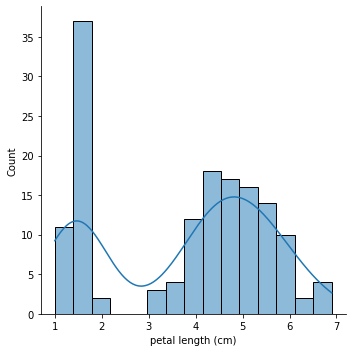

In [16]:
sns.displot(data=dataset, x='petal length (cm)', bins=15, kde=True)
plt.show()

#### Ejemplo 4. Gráficos de Diagramas de caja

$\color{Purple}{\text{Con Matplotlib}}$

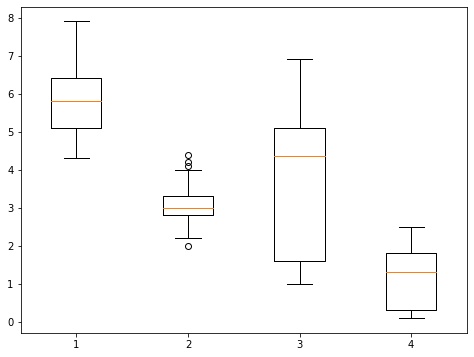

In [17]:
fig = plt.figure(figsize =(8, 6))
plt.boxplot(dataset.drop('species', axis=1))
plt.show()

$\color{blue}{\text{Con Seaborn}}$

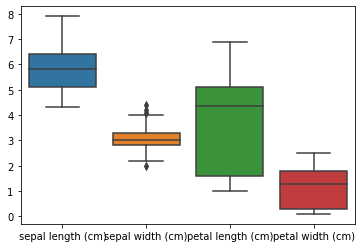

In [18]:
sns.boxplot(data=dataset.drop('species', axis=1))
plt.show()

#### Ejemplo 5. Gráficos de Parcelas de violín

$\color{Purple}{\text{Con Matplotlib}}$

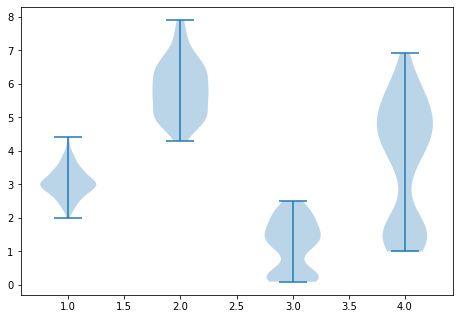

In [19]:
fig = plt.figure()
data = [dataset['sepal width (cm)'], 
                dataset['sepal length (cm)'], 
                dataset['petal width (cm)'], 
                dataset['petal length (cm)']]
ax = fig.add_axes([0,0,1,1])
bp = ax.violinplot(data)
plt.show()

$\color{blue}{\text{Con Seaborn}}$

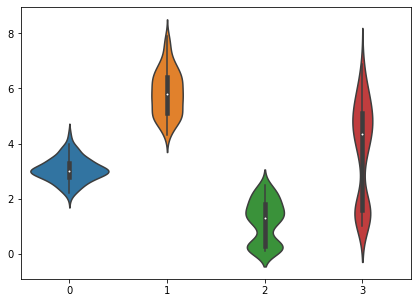

In [20]:
fig, ax = plt.subplots(figsize=(7, 5))
data = [dataset['sepal width (cm)'], 
                dataset['sepal length (cm)'], 
                dataset['petal width (cm)'], 
                dataset['petal length (cm)']]
sns.violinplot(data=data)
plt.show()

### Visualización con Seaborn

| Tipos de objetos | Plot types |Características|
|:- |:-|:-|
|FacetGrid|relplot(), catplot(), displot(), etc.|Puede crear subplots|
|AxesSubplot|scatterplot(), countplot(), linesplot(), etc.|Solo crea un solo gráfico|

In [21]:
df = pd.read_csv('Riesgo_morosidad.csv',sep=',')

In [22]:
df.head()

,edad,sexo,nrodepen,fonopart,fonolab,autovaluo,esaval,tieneaval,antiguedad,tiporenta,dpto,morosidad,nivel_educativo
0,44,Masculino,3,Si,Si,No,No,No,63,Fijo,Lima,No Moroso,primaria
1,77,Masculino,4,Si,Si,No,No,Si,62,Fijo,Lima,Moroso,secundaria
2,59,Masculino,5,No,No,No,Si,No,59,Fijo,Lima,Moroso,universitario
3,35,Masculino,5,No,Si,No,No,No,58,Fijo,Lima,Moroso,bachiller
4,65,Masculino,0,Si,No,No,Si,No,56,Fijo,Lima,No Moroso,postgrado


**Colores** 

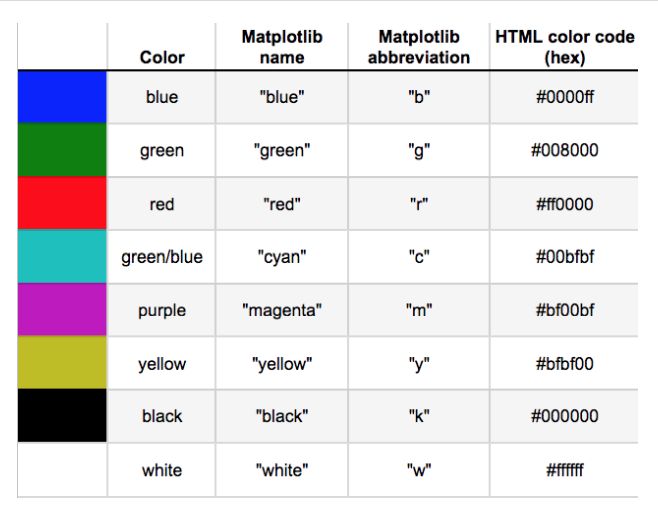

## Gráficos

### Diagrama de Barras

#### Ejemplo 
Cree un gráfico de barras (conteo) y no use el plt.show()
<br>
Variable: "morosidad"

<Axes: xlabel='morosidad', ylabel='count'>

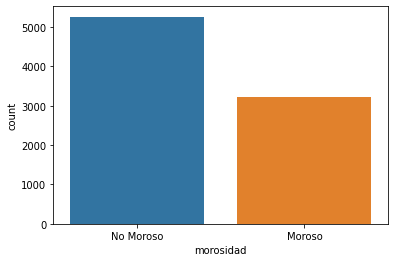

In [23]:
sns.countplot(x="morosidad",
              data=df)

#### Ejemplo 
Cree un gráfico de barras (conteo) 
<br>
Variable: "morosidad"

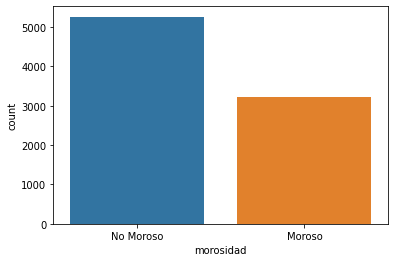

In [24]:
sns.countplot(x="morosidad",
              data=df)
plt.show()

#### Ejemplo 
Cree un gráfico de barras (conteo) donde se subdivida en categorías cada barra. 
<br>
Variable: "morosidad"
<br>
Categoría para subdividir: "sexo"

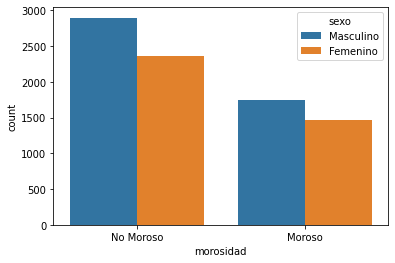

In [25]:
sns.countplot(x="morosidad",
              data=df,
             hue="sexo")
plt.show()

#### Ejemplo 
Cree un gráfico de conteo usando sns.catplot()
<br>
Variable: "morosidad"

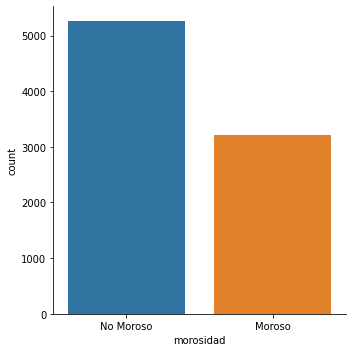

In [26]:
sns.catplot(x="morosidad",
           data=df,
           kind="count")

plt.show()

#### Ejemplo
Ordenando las categoría. Las categorías de la variable morosidad ubíquelas en
el siguiente orden "Moroso","No Moroso". 

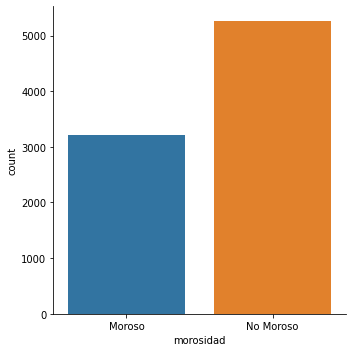

In [27]:
orden_categoria=["Moroso","No Moroso"]

sns.catplot(x="morosidad",
           data=df,
           kind="count",
           order=orden_categoria)

plt.show()

### Gráfico de Barras (Media de la variable cuantitativa por categoría)

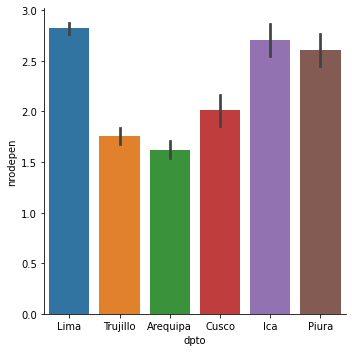

In [28]:
sns.catplot(x="dpto",
            y="nrodepen",
            data=df,
            kind="bar")

plt.show()

# las lineas representan el intervalo de confianza al 95% de la media 

In [29]:
df_agre = df.groupby(['dpto']).agg({
                    'nrodepen': ['mean']
                    }).reset_index()
df_agre

,dpto,nrodepen
,,mean
0,Arequipa,1.622000
1,Cusco,2.010000
2,Ica,2.706000
3,Lima,2.823600
4,Piura,2.605096
5,Trujillo,1.755000


#### Ejemplo 
No muestre las lineas de intervalo de confianza 

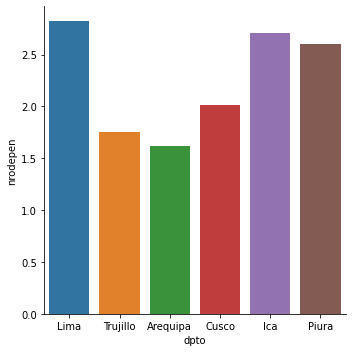

In [30]:
sns.catplot(x="dpto",
            y="nrodepen",
           data=df,
           kind="bar",
           ci=None)

plt.show()

#### Ejemplo 
Muestre el gráfico de barras de manera horizontal 

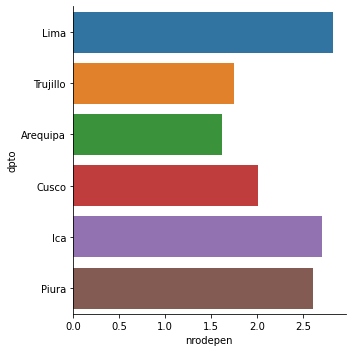

In [31]:
sns.catplot(x="nrodepen",
            y="dpto",
            data=df,
            kind="bar",
            ci=None)

plt.show()

### Box Plot

#### Ejemplo 
Cree un gráfico de cajas para la variable edad para cada dpto. 

Data: df 

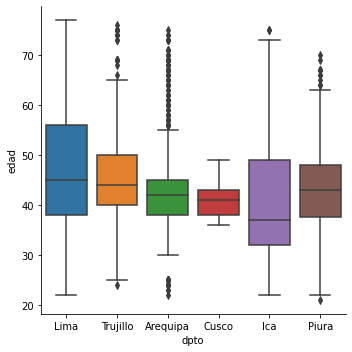

In [32]:
sns.catplot(x="dpto" , 
                y="edad" , 
                data=df, 
                kind="box") 

plt.show()

#### Ejemplo 
Cambiar el orden de las categorías de dpto de la siguiente forma.
"Lima","Arequipa","Cusco","Trujillo","Ica","Piura"

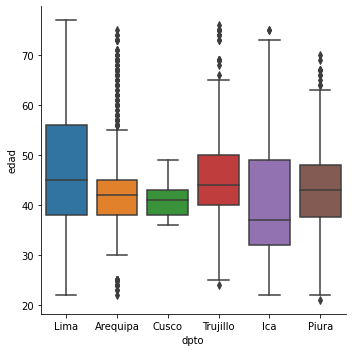

In [33]:
sns.catplot(x="dpto" , 
                y="edad" , 
                data=df, 
                kind="box",
                order=["Lima","Arequipa","Cusco","Trujillo","Ica","Piura"]) 

plt.show()

#### Ejemplo 
Omitir los ouliers del gráfico de cajas

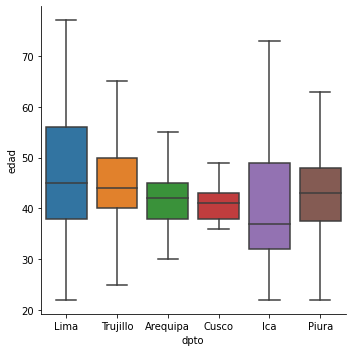

In [34]:
sns.catplot(x="dpto" , 
                y="edad" , 
                data=df, 
                kind="box",
                sym="") 

plt.show()

#### Modificaciones a los bigotes del gráfico de cajas 
Usaremos el parámetro whis. Por defecto la extensión de los bigotes son 1.5 * IQR

#### Ejemplo 
Realice el gráfico de cajas anterior, considerando una extensión de los bigotes de 2*IQR y dejar que se muestren los outliers

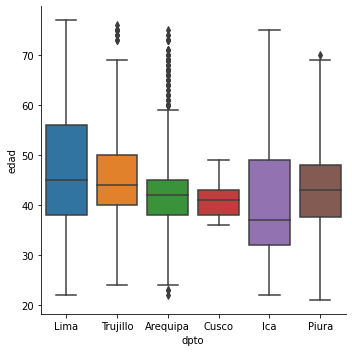

In [35]:
sns.catplot(x="dpto" , 
                y="edad" , 
                data=df, 
                kind="box",
                whis=2) 

plt.show()

#### Ejemplo 
Realice el gráfico de cajas anterior considerando lo siguiente: 
<br>
Valor mínimo del bigote: Percentil 5    
Valor máximo del bigote: Percentil 95    
    
Dejar que se muestren los outliers

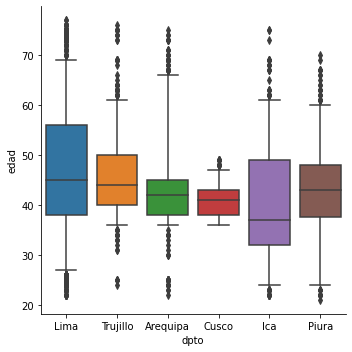

In [36]:
sns.catplot(x="dpto" , 
                y="edad" , 
                data=df, 
                kind="box",
                whis=[5,95]) 

plt.show()

#### Ejemplo 
Realice el gráfico de cajas anterior considerando lo siguiente: 
<br>
Valor mínimo del bigote: Valor mínimo    
Valor máximo del bigote: Valor máximo  

Es decir, no se mostrará outliers dado que todo se esta abarcando con el gráfico de cajas. 

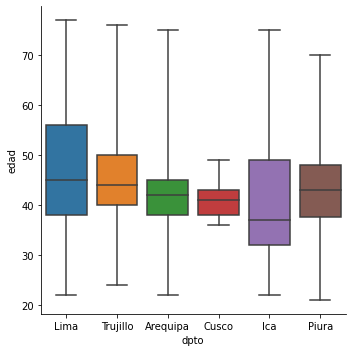

In [37]:
sns.catplot(x="dpto" , 
                y="edad" , 
                data=df, 
                kind="box",
                whis=[0,100]) 

plt.show()

### Gráfico de Dispersión 
Nos ayuda a ver la relación entre dos variables cuantitativas

#### Ejemplo 
Cree el Gráfico de Dispersión para la variable edad vs antiguedad

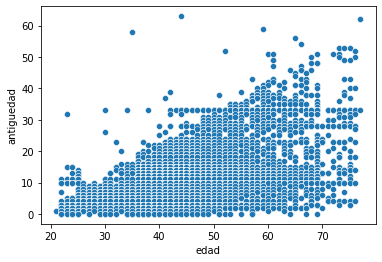

In [38]:
sns.scatterplot(x="edad",
                y="antiguedad",
                data=df)
plt.show()

**Otra Forma**
<br>
Tambien podemos usar relplot() para crear "relational plots": gráficos de dispersión o de lineas. En este caso crearemos un gráfico de dispersión. 

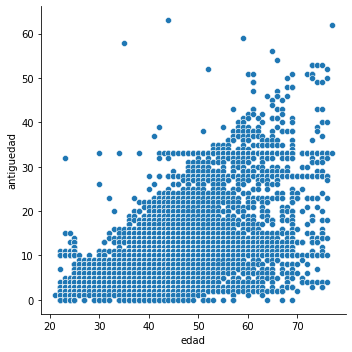

In [39]:
sns.relplot(x="edad",
            y="antiguedad",
            data=df, 
            kind='scatter')
plt.show()

#### Ejemplo
Agregando una categoría para distinguirlo con diferentes colores.
<br>
Categoría: morosidad

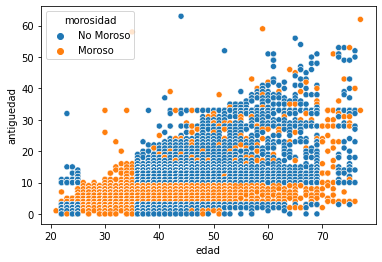

In [40]:
sns.scatterplot(x="edad",
                y="antiguedad",
                data=df,
                hue="morosidad")
plt.show()

#### Ejemplo
Colocando un orden en hue. 
<br>
Colocar primero la categoría "Moroso" y luego "No Moroso"

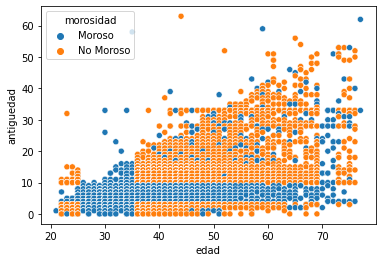

In [41]:
sns.scatterplot(x="edad",
                y="antiguedad",
                data=df,
                hue="morosidad",
                hue_order=["Moroso",
                          "No Moroso"])
plt.show()

#### Ejemplo
Definiendo el color rojo para "Moroso" y negro para "No Moroso"

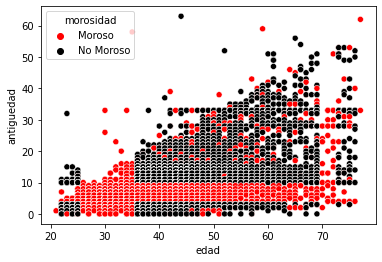

In [42]:
# Definiendo los colores que requerimos 
colores={"Moroso": "red",
            "No Moroso": "black"}

sns.scatterplot(x="edad",
                y="antiguedad",
                data=df,
                hue="morosidad",
                hue_order=["Moroso",
                          "No Moroso"],
               palette=colores # Asignando los colores al parametro palette
               )
plt.show()

#### Ejemplo
Definiendo el color rojo para "Moroso" y negro para "No Moroso". Usar su código hexadecimal. 

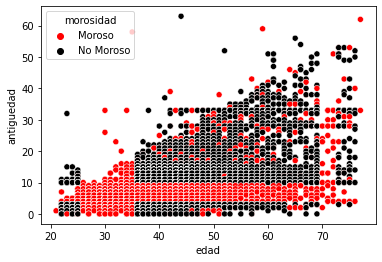

In [43]:
# Definiendo los colores que requerimos usando su código hexadecimal
colores={"Moroso": "#ff0000", # rojo
            "No Moroso": "#000000" # negro
        }

sns.scatterplot(x="edad",
                y="antiguedad",
                data=df,
                hue="morosidad",
                hue_order=["Moroso",
                          "No Moroso"],
               palette=colores # Asignando los colores al parametro palette
               )
plt.show()

#### Ejemplo 
Muestre el diagrama de dispersión de edad vs antiguedad.
Y los subgrupos de la variable morosidad en dos gráficas separadas.

***Pista: Puede usar relplot() ya que permite crear subplots en una misma figura***


En columnas

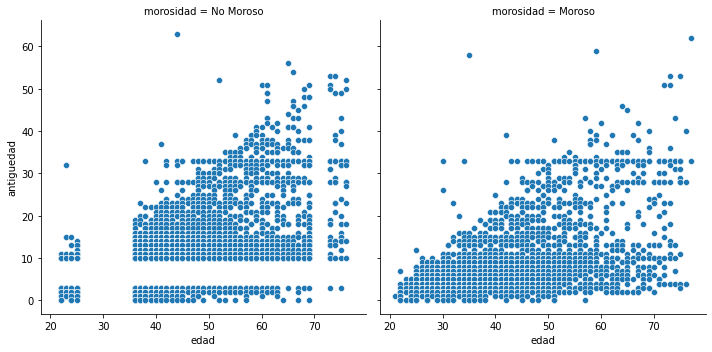

In [44]:
sns.relplot(x="edad",
            y="antiguedad",
            data=df, 
            kind='scatter',
           col='morosidad')
plt.show()

En filas

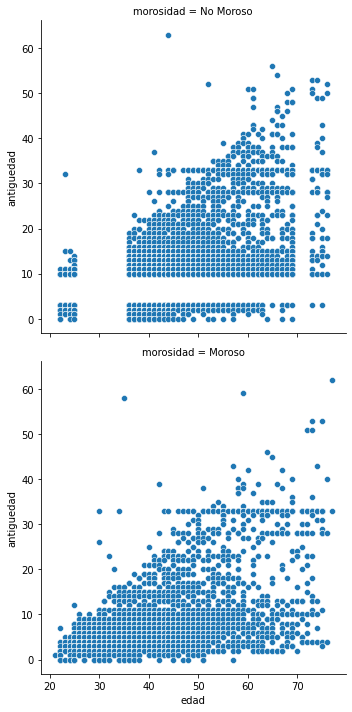

In [45]:
sns.relplot(x="edad",
            y="antiguedad",
            data=df, 
            kind='scatter',
            row='morosidad')
plt.show()

#### Ejemplo 
Muestre el diagrama de dispersión de edad vs antiguedad.
<br>
Además, generar subgrupos teniendo en la columna a la variable 'morosidad' 
y en filas al 'tiporenta'

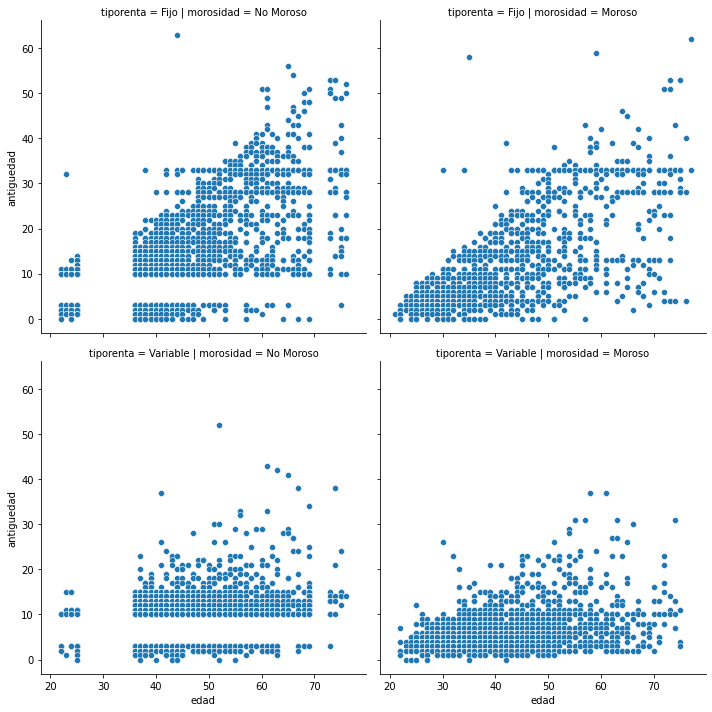

In [46]:
sns.relplot(x="edad",
            y="antiguedad",
            data=df, 
            kind='scatter',
            col='morosidad',
            row='tiporenta')
plt.show()

#### Ejemplo 
Muestre el diagrama de dispersión de edad vs antiguedad.
<br>
Además, generar subgrupos teniendo en la columna a la variable 'nrodepen' 
y mostrar máximo 3 gráficos en por fila.  

Paso 1: 

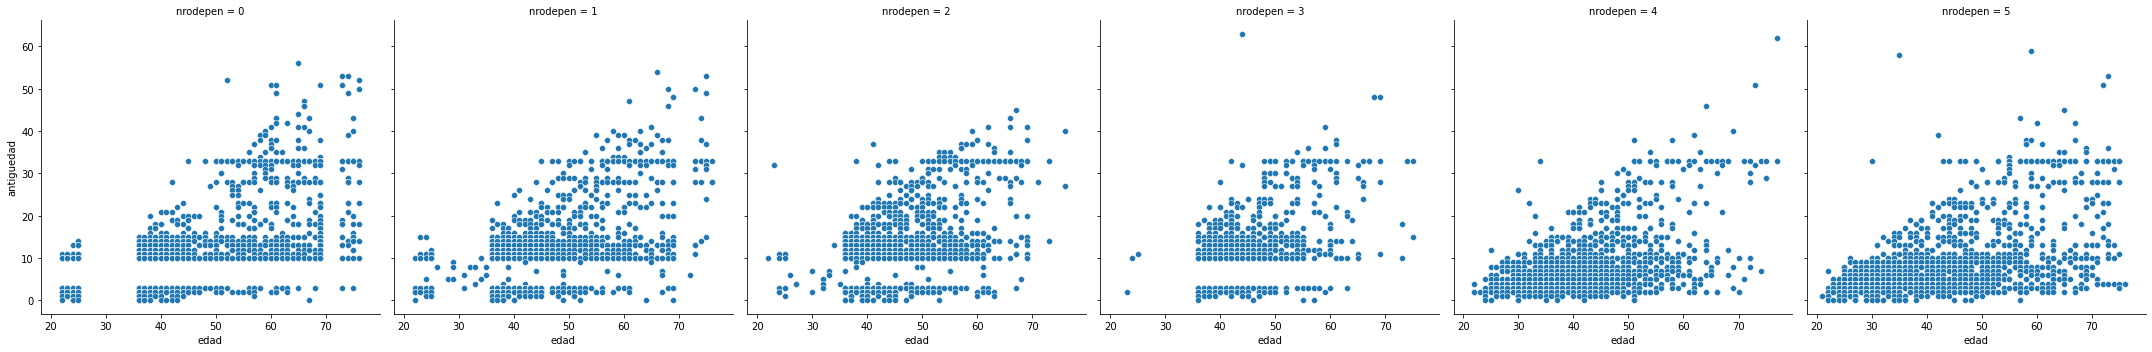

In [47]:
sns.relplot(x="edad",
            y="antiguedad",
            data=df, 
            kind='scatter',
            col='nrodepen')
plt.show()

Paso 2: 

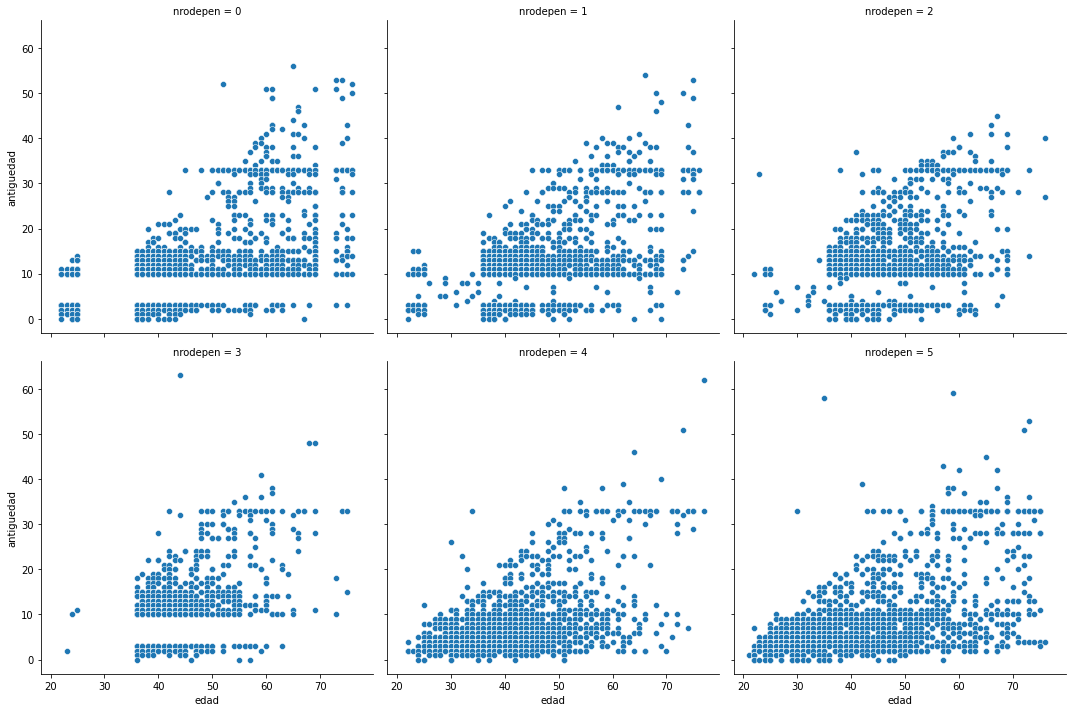

In [48]:
sns.relplot(x="edad",
            y="antiguedad",
            data=df, 
            kind='scatter',
            col='nrodepen',
            col_wrap=3 # Indicandole que debe de mostrar máximo 3 columnas por fila
           )
plt.show()

#### Ejemplo
Define el orden de los gráficos según la variable 'nrodepen'.
<br>
Orden: [1,2,3,4,5,0]

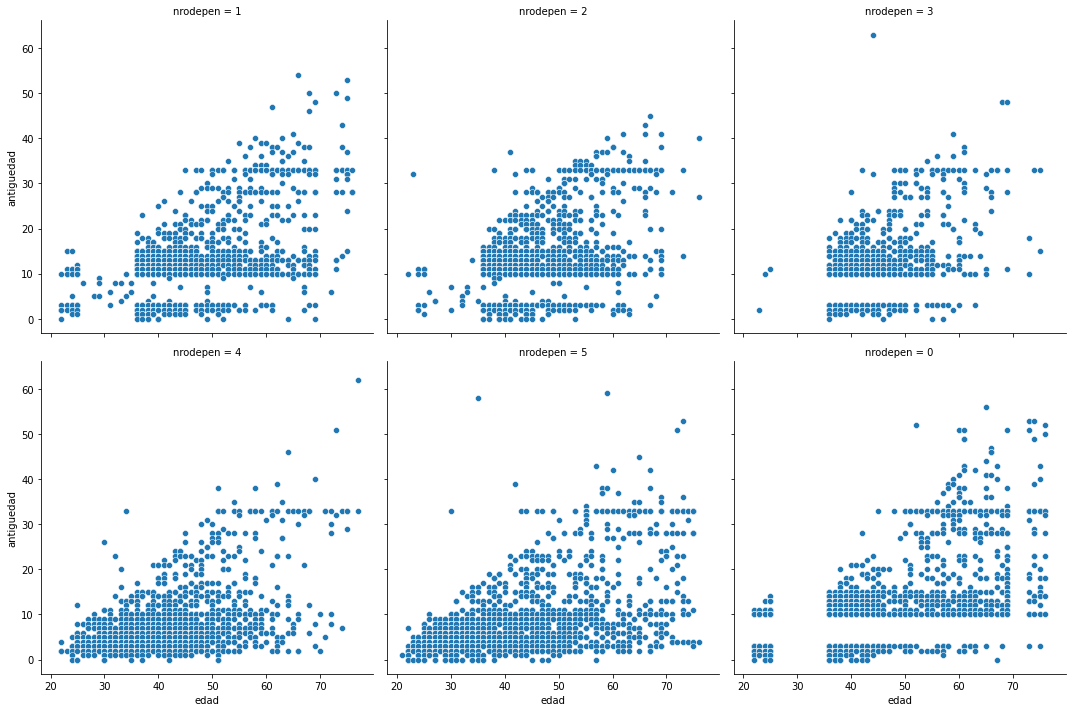

In [49]:
sns.relplot(x="edad",
            y="antiguedad",
            data=df, 
            kind='scatter',
            col='nrodepen',
            col_wrap=3,
            col_order=[1,2,3,4,5,0] # Orden según la variable indicada en col
           )
            
plt.show()

#### Customización de Gráfico de Dispersión 

In [50]:
# Creando una nueva columna en el DataFrame 
df['nrodepen2']=df['nrodepen'].astype('str')
df['nrodepen2'][df['nrodepen']>=2]='2+'
df['nrodepen2']=df['nrodepen2'].str.strip() # Quitando los espacios en blanco

In [51]:
df.head()

,edad,sexo,nrodepen,fonopart,fonolab,autovaluo,esaval,tieneaval,antiguedad,tiporenta,dpto,morosidad,nivel_educativo,nrodepen2
0,44,Masculino,3,Si,Si,No,No,No,63,Fijo,Lima,No Moroso,primaria,2+
1,77,Masculino,4,Si,Si,No,No,Si,62,Fijo,Lima,Moroso,secundaria,2+
2,59,Masculino,5,No,No,No,Si,No,59,Fijo,Lima,Moroso,universitario,2+
3,35,Masculino,5,No,Si,No,No,No,58,Fijo,Lima,Moroso,bachiller,2+
4,65,Masculino,0,Si,No,No,Si,No,56,Fijo,Lima,No Moroso,postgrado,0


#### Ejemplo 
Quieres evaluar si agregar que el tamaño de los puntos dependa de la variable nrodepen2. 

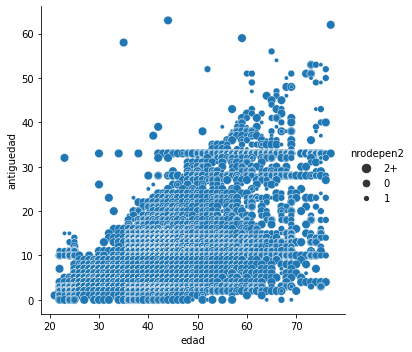

In [52]:
sns.relplot(x="edad",
            y="antiguedad",
            data=df, 
            kind='scatter',
            size='nrodepen2')
plt.show()

#### Ejemplo 
Además, que para cada nrodepen2 diferente se tenga diferente tono de color. 

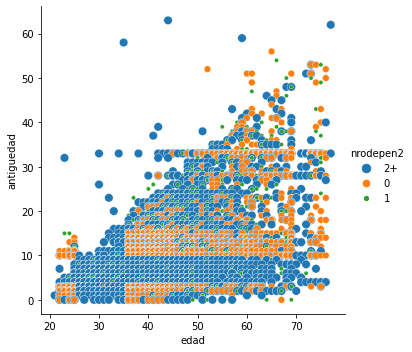

In [53]:
sns.relplot(x="edad",
            y="antiguedad",
            data=df, 
            kind='scatter',
            size='nrodepen2',
            hue='nrodepen2')
plt.show()

#### Ejemplo 
Ahora agregar que el tamaño de los puntos este ordenado (size_order) y que se muestren en orden (hue_order)

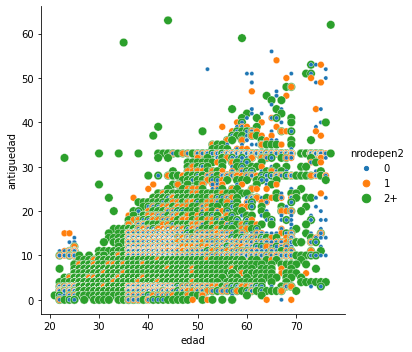

In [54]:
sns.relplot(x="edad",
            y="antiguedad",
            data=df, 
            kind='scatter',
            size='nrodepen2',
            hue='nrodepen2',
            size_order=['2+','1','0'], # Orden especificado para la aparición de los niveles de la variable de tamaño (De mayor tamaño a menor)
            hue_order=['0','1','2+'] # Especifique el orden de procesamiento y trazado para los niveles categóricos.
           )
plt.show()

Cargando datos

In [55]:
df_prom = pd.read_csv('med_hora.csv',sep=',')

In [56]:
df_prom

,hora,medicion_prom
0,10,31.56
1,11,31.47
2,12,32.19
3,13,32.32
4,14,31.76
5,15,32.43
6,16,32.07
7,17,31.59
8,18,29.88
9,19,30.13


In [57]:
df_lugar = pd.read_csv('med_lugar_hora.csv',sep=',')

In [58]:
df_lugar.head(6)

,hora,cat_lugar,medicion
0,10,Norte,32.87
1,10,Sur,30.46
2,10,Centro,31.34
3,11,Norte,35.95
4,11,Sur,29.95
5,11,Centro,28.51


In [59]:
df_lugar.tail(6)

,hora,cat_lugar,medicion
36,22,Norte,34.18
37,22,Sur,38.98
38,22,Centro,28.48
39,23,Norte,38.56
40,23,Sur,40.65
41,23,Centro,27.57


### Gráfico de Lineas

#### Ejemplo 
Realiza un gráfico de linea para la variable medicion_prom dependiendo de la hora. 

Data: df_prom

In [60]:
df_prom

,hora,medicion_prom
0,10,31.56
1,11,31.47
2,12,32.19
3,13,32.32
4,14,31.76
5,15,32.43
6,16,32.07
7,17,31.59
8,18,29.88
9,19,30.13


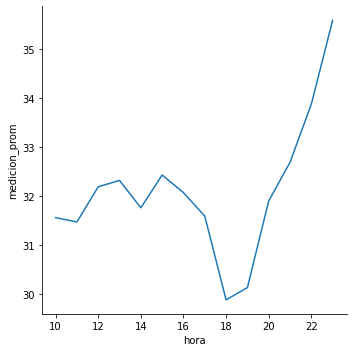

In [61]:
sns.relplot(x="hora",
            y="medicion_prom" , 
            data=df_prom, 
            kind="line") 

plt.show()

#### Ejemplo 
Realice un gráfico de linea para la variable medicion por hora que incluya subgrupos por la variable cat_lugar.

Data: df_lugar 

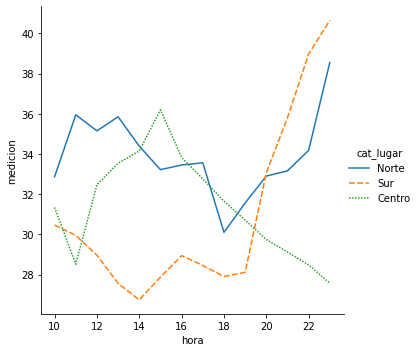

In [62]:
sns.relplot(x="hora" , 
            y="medicion" , 
            data= df_lugar, 
            kind="line" , 
            style="cat_lugar" , 
            hue="cat_lugar") 

plt.show()

#### Ejemplo 
Agrege un marcador diferente para cada subgrupo.

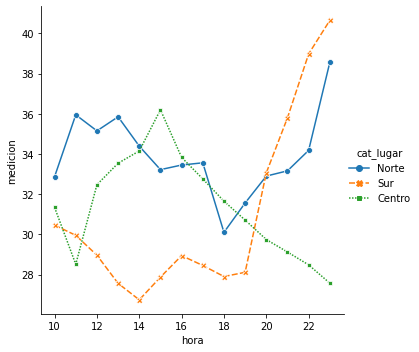

In [63]:
sns.relplot(x="hora" , 
            y="medicion", 
            data=df_lugar, 
            kind="line", 
            style="cat_lugar", 
            hue="cat_lugar", 
            markers=True) 
plt.show()

#### Ejemplo 
¿Cómo podemos tener un solo estilo de linea(linea continua) para todos los subgrupos?

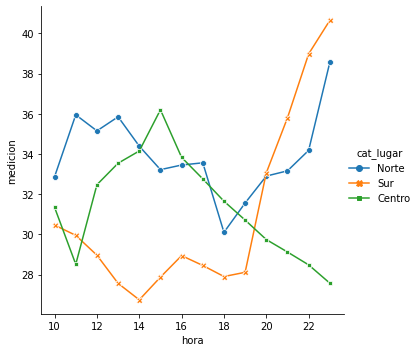

In [64]:
sns.relplot(x="hora" , 
            y="medicion" , 
            data=df_lugar, 
            kind="line" , 
            style="cat_lugar", 
            hue="cat_lugar", 
            markers=True,
            dashes=False) 
plt.show()

#### Ejemplo 
¿Qué pasa si hacemos un gráfico de lineas que tiene varios valores por cada 
valor de x?

Se mostraría un gráfico de linea para la media de los valores por cada punto en x. Además el intervalo de confianza del 95% para la media.

In [65]:
df_lugar

,hora,cat_lugar,medicion
0,10,Norte,32.87
1,10,Sur,30.46
2,10,Centro,31.34
3,11,Norte,35.95
4,11,Sur,29.95
5,11,Centro,28.51
6,12,Norte,35.15
7,12,Sur,28.96
8,12,Centro,32.47
9,13,Norte,35.85


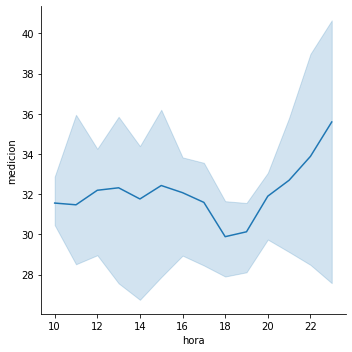

In [66]:
sns.relplot(x="hora" , 
            y="medicion", 
            data=df_lugar, 
            kind="line") 
plt.show()

#### Ejemplo
¿Cómo pordría representar la desviación estandar en lugar de tener el intervalo de confianza de 95%? 

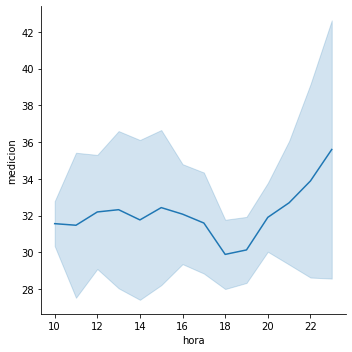

In [67]:
sns.relplot(x="hora" , 
            y="medicion", 
            data=df_lugar, 
            kind="line",
            ci="sd" # Para que el área sombreada represente la desviación estandar
            ) 
plt.show()

In [68]:
df_agre = df_lugar.groupby(['hora']).agg({
                    'medicion': ['std']
                    }).reset_index()
df_agre

,hora,medicion
,,std
0,10,1.219522
1,11,3.946036
2,12,3.104261
3,13,4.278251
4,14,4.349103
5,15,4.220817
6,16,2.720190
7,17,2.748581
8,18,1.884365


#### Ejemplo 
No mostrar la sombra del intervalo de confianza

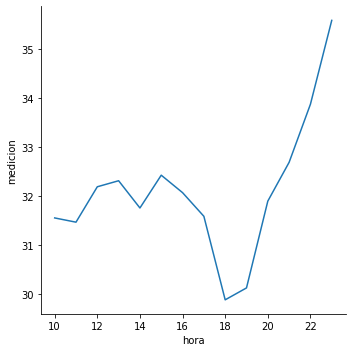

In [69]:
sns.relplot(x="hora" , 
            y="medicion", 
            data=df_lugar, 
            kind="line",
            ci=None
            ) 
plt.show()

### Gráfico de puntos 

Los gráficos de puntos muestran la media de una variable cuantitativa para las observaciones en cada categoría, graficada como un solo punto.

**Similitudes entre Gráfico de puntos, lineas y barras**

Todas estas gráficas muestran: 
- La media de la variable cuantitativa
- El intervalo de confianza del 95% 

**Diferencias entre Gráfico de puntos y lineas**

- El gráfico de lineas en el eje x tiene una variable ligada al tiempo usualmente 
- El gráfico de puntos tiene una variable categórica en el eje x

Veamos primero un gráfico de barras

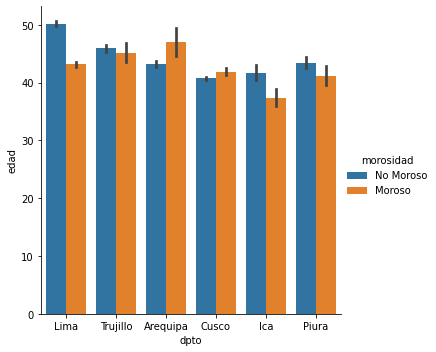

In [70]:
sns.catplot(x="dpto",
            y="edad",
           data=df,
           kind="bar",
           hue="morosidad")

plt.show()

#### Ejemplo 
Realicemos el gráfico de puntos teniendo en cuenta los siguiente: 
<br>
x="dpto"
<br>
y="edad" 
<br>
Agrege la subcategoría morosidad. 

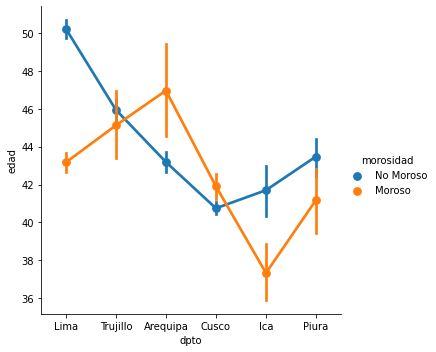

In [71]:
sns.catplot(x="dpto",
            y="edad",
           data=df,
           kind="point",
           hue="morosidad")

plt.show()

#### Ejemplo
Ahora, no muestre las lineas que conectan los puntos. 

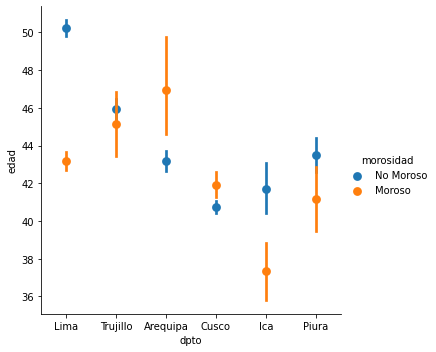

In [72]:
sns.catplot(x="dpto",
            y="edad",
           data=df,
           kind="point",
           hue="morosidad",
           join=False)

plt.show()

#### Ejemplo
En lugar de usar la media (por defecto), use la mediana como estimador. 

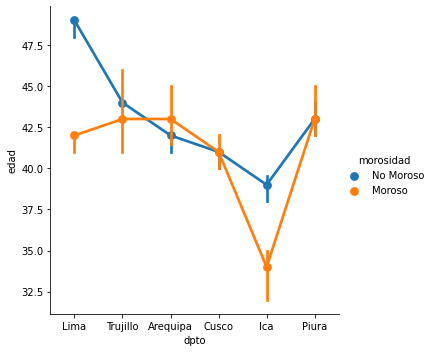

In [73]:
from numpy import  median
sns.catplot(x="dpto",
            y="edad",
           data=df,
           kind="point",
           hue="morosidad",
           estimator=median)

plt.show()

#### Ejemplo
No mostrar los intervalos de confianza

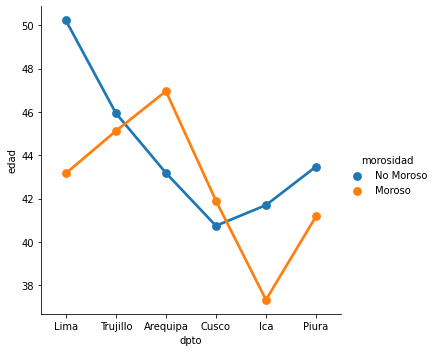

In [74]:
sns.catplot(x="dpto",
            y="edad",
           data=df,
           kind="point",
           hue="morosidad",
           ci=None)

plt.show()

## Personalización de gráficos

### Cambiar el estilo

Este cambio involucra un ajuste tanto en el background y en el axes. 
En Seaborn tiene cinco estilos predeterminados:

- "white" ( Es el estilo por defecto )
- "whitegrid" ( Es útil si desea que su audiencia pueda determinar los valores específicos de los puntos graficados en lugar de realizar observaciones de mayor nivel )
- "dark"
- "darkgrid"
- "ticks"

#### Ejemplo 
Mostrar cada uno de los estilos 

In [49]:
#sns.set_style("white")

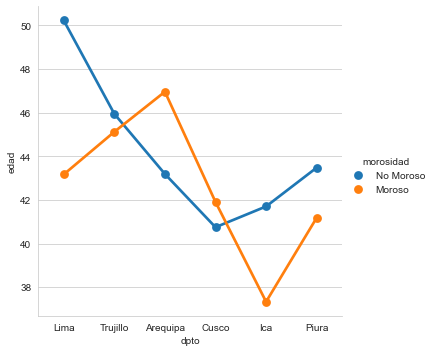

In [75]:
sns.set_style("whitegrid")
sns.catplot(x="dpto",
            y="edad",
           data=df,
           kind="point",
           hue="morosidad",
           ci=None)

plt.show()

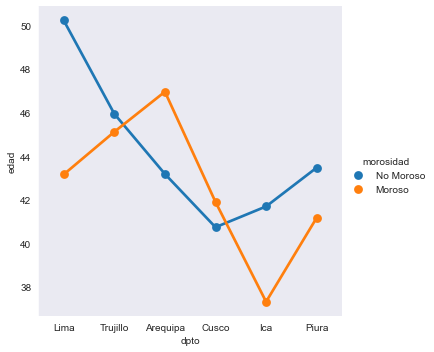

In [76]:
sns.set_style("dark")

sns.catplot(x="dpto",
            y="edad",
           data=df,
           kind="point",
           hue="morosidad",
           ci=None)

plt.show()

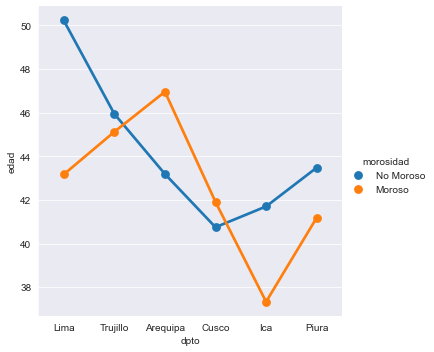

In [77]:
sns.set_style("darkgrid")

sns.catplot(x="dpto",
            y="edad",
           data=df,
           kind="point",
           hue="morosidad",
           ci=None)

plt.show()

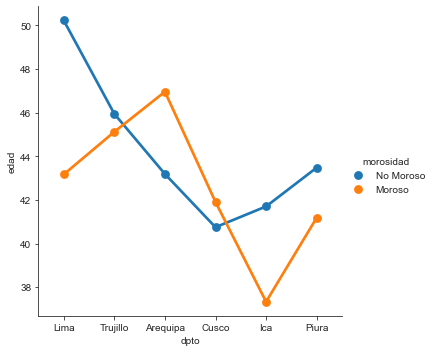

In [78]:
sns.set_style("ticks")

sns.catplot(x="dpto",
            y="edad",
           data=df,
           kind="point",
           hue="morosidad",
           ci=None)

plt.show()

### Cambiando la paleta de colores usada

**Paletas Divergentes** 

Es recomendable usarlas si su visualización trata con una escala donde los dos extremos de la escala son opuestos y hay un punto medio neutral.

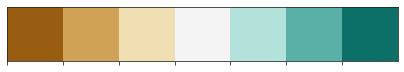

In [79]:
sns.palplot(sns.color_palette("BrBG", 7))

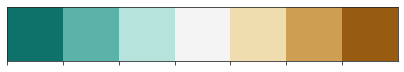

In [80]:
sns.palplot(sns.color_palette("BrBG_r", 7))

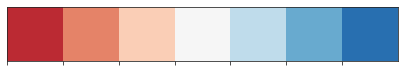

In [81]:
sns.palplot(sns.color_palette("RdBu", 7))

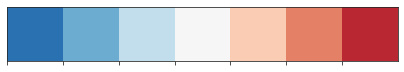

In [82]:
sns.palplot(sns.color_palette("RdBu_r", 7))

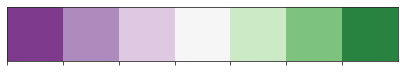

In [83]:
sns.palplot(sns.color_palette("PRGn", 7))

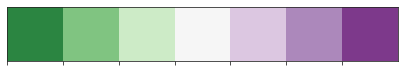

In [84]:
sns.palplot(sns.color_palette("PRGn_r", 7))

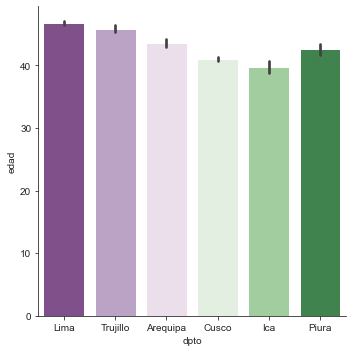

In [85]:
sns.set_palette("PRGn")

sns.catplot(x="dpto",
            y="edad",
            data=df,
            kind="bar")

plt.show()

**Paletas Secuenciales** 

Estos son de un solo color (o dos colores combinados) que se mueven de valores claros a oscuros.

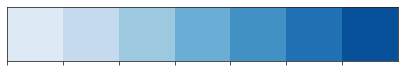

In [86]:
sns.palplot(sns.color_palette("Blues", 7))

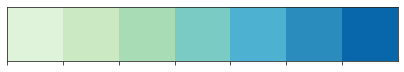

In [87]:
sns.palplot(sns.color_palette("GnBu", 7))

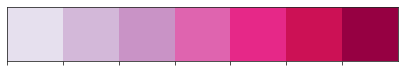

In [88]:
sns.palplot(sns.color_palette("PuRd", 7))

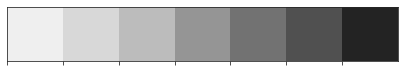

In [89]:
sns.palplot(sns.color_palette("Greys", 7))

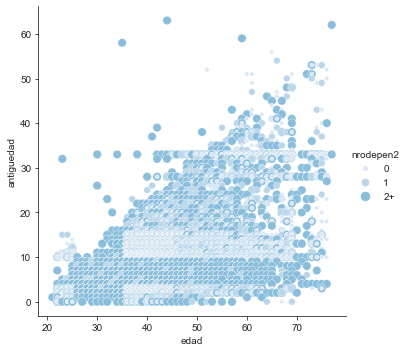

In [90]:
sns.set_palette("Blues")
sns.relplot(x="edad",
            y="antiguedad",
            data=df, 
            kind='scatter',
            size='nrodepen2',
            hue='nrodepen2',
            size_order=['2+','1','0'], # Orden especificado para la aparición de los niveles de la variable de tamaño (De mayor tamaño a menor)
            hue_order=['0','1','2+'] # Especifique el orden de procesamiento y trazado para los niveles categóricos.
           )
plt.show()

### Creación de paletas personalizadas 

#### Ejemplo
Crea una paleta de colores usando los nombres

In [91]:
paleta= ["red","purple","yellow","orange","green","blue"]

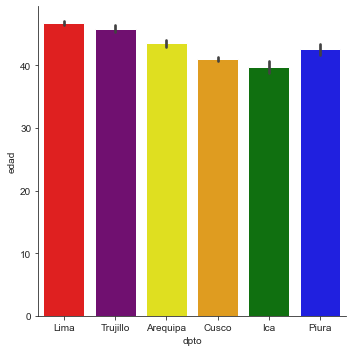

In [92]:
sns.set_palette(paleta)
sns.catplot(x="dpto",
            y="edad",
            data=df,
            kind="bar")

plt.show()

#### Ejemplo
Crea una paleta de colores usando los códigos hexadecimal 

In [93]:
paleta2= ["#ff6961","#fdcae1","#fdfd96","#fcb7af","#77dd77","#84b6f4"]

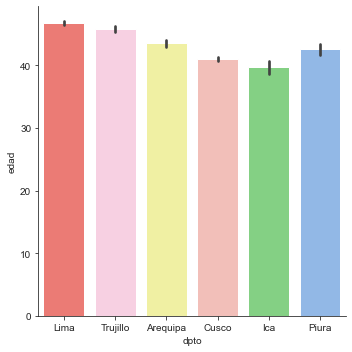

In [94]:
sns.set_palette(paleta2)

sns.catplot(x="dpto",
            y="edad",
            data=df,
            kind="bar")

plt.show()

### Rotación de ejes 

#### Ejemplo 
Gire el eje x 90°. 
Esto usualmente es útil cuando las etiquetas del eje x se solapan y girandolas
se pueden visualizar mejor. 

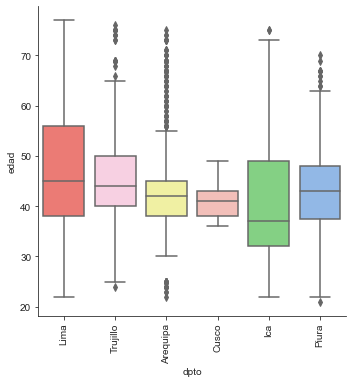

In [95]:
sns.catplot(x="dpto",
            y="edad",
            data=df,
            kind="box")

plt.xticks(rotation=90)


plt.show()

#### Etiquetas en el eje x e y 

#### Ejemplo 
Ajuste las etiquetas del eje x e  y.
<br>
xlabel="Departamento"
<br>
ylabel="Edad"

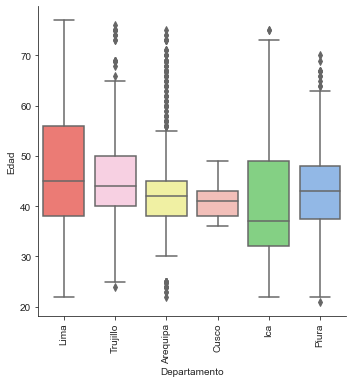

In [96]:
a=sns.catplot(x="dpto",
            y="edad",
            data=df,
            kind="box")

a.set(xlabel="Departamento", ylabel="Edad")
plt.xticks(rotation=90)

plt.show()

### Agregando título 

#### Ejemplo 
Agregar título a un objeto AxesSubplot 

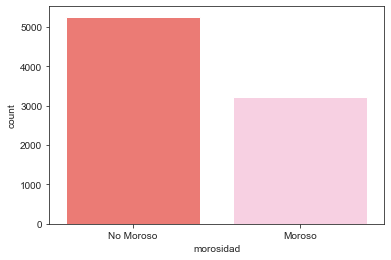

In [97]:
a= sns.countplot(x="morosidad",
              data=df)

In [98]:
# Validando que tipo de objeto es
type(a)

matplotlib.axes._axes.Axes

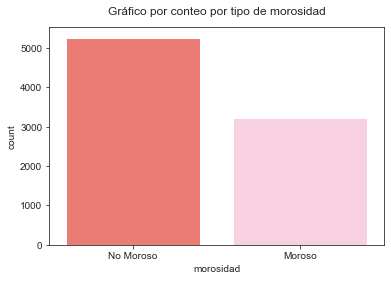

In [99]:
a=sns.countplot(x="morosidad",
              data=df)
a.set_title("Gráfico por conteo por tipo de morosidad",y=1.03) # Agregando el título
plt.show()

#### Ejemplo 
Agregar título a un objeto FacetGrid 

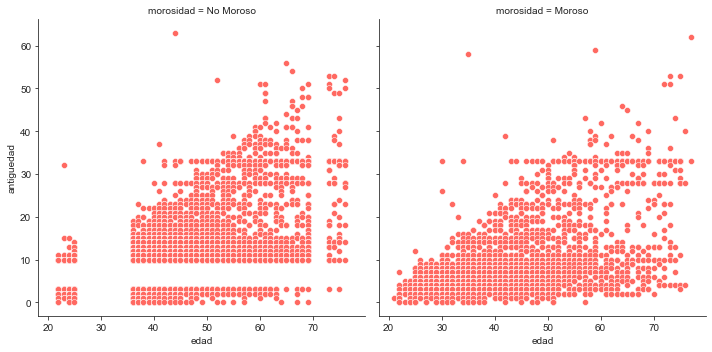

In [100]:
a=sns.relplot(x="edad",
            y="antiguedad",
            data=df, 
            kind='scatter',
           col='morosidad')

In [101]:
# Validando que tipo de objeto es
type(a)

seaborn.axisgrid.FacetGrid

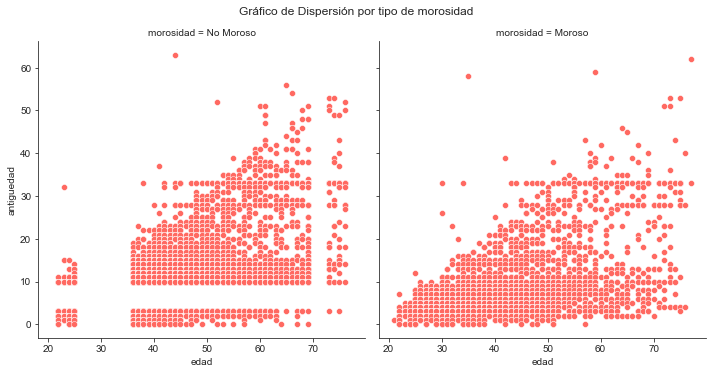

In [102]:
a=sns.relplot(x="edad",
            y="antiguedad",
            data=df, 
            kind='scatter',
           col='morosidad')

a.fig.suptitle("Gráfico de Dispersión por tipo de morosidad",y=1.03) # Agregando el título
plt.show()

#### Ejemplo 
Ahora agregar un subtítulo a cada unos de los subgráficos donde solo se mencione
el nombre de la categoría que corresponda.

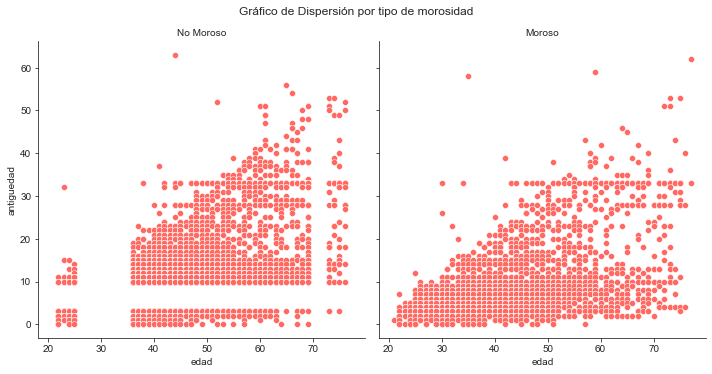

In [103]:
a=sns.relplot(x="edad",
            y="antiguedad",
            data=df, 
            kind='scatter',
           col='morosidad')

a.fig.suptitle("Gráfico de Dispersión por tipo de morosidad",y=1.03)
a.set_titles("{col_name}") 

## Unificando todo

In [104]:
# Defiendo los colores de la paleta (pasteles)
paleta2= ["#ff6961","#fdcae1","#fdfd96","#fcb7af","#77dd77","#84b6f4"]

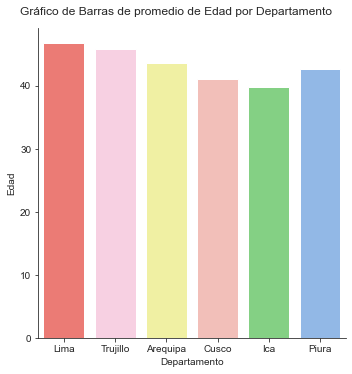

In [105]:
# Indicando la paleta de colores a usar
sns.set_palette(paleta2)

# Realizando el gráfico correspondiente 
a=sns.catplot(x="dpto",
            y="edad",
            data=df,
            kind="bar",
            ci=None # No mostrar los intervalos de confianza
             )

# Ajustando las etiquetas de los ejes x e y 
a.set(xlabel="Departamento", ylabel="Edad")

# Colocando el título 
a.fig.suptitle("Gráfico de Barras de promedio de Edad por Departamento",y=1.03)

# Mostrando la gráfica
plt.show()

## BONUS: Cambiando la escala 

Con sns.context() podemos cambiar la escala de los elementos del gráfico 
y etiquetas. 

De más pequeño  a mayor tamaño: 
- "paper" (Por defecto)
- "notebook"
- "talk" 
- "poster"

#### Ejemplo:
Muestre la gráfica anterior en los diferentes contextos 

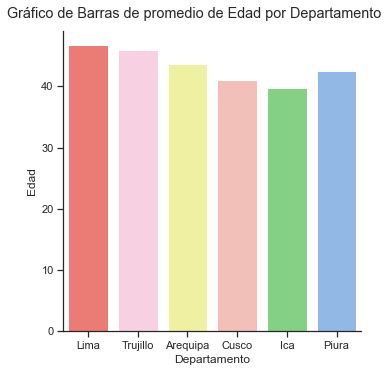

In [106]:
# Definiendo context para su ajuste de la escala
sns.set_context("notebook")

# Indicando la paleta de colores a usar
sns.set_palette(paleta2)

# Realizando el gráfico correspondiente 
a=sns.catplot(x="dpto",
            y="edad",
            data=df,
            kind="bar",
            ci=None # No mostrar los intervalos de confianza
             )

# Ajustando las etiquetas de los ejes x e y 
a.set(xlabel="Departamento", ylabel="Edad")

# Colocando el título 
a.fig.suptitle("Gráfico de Barras de promedio de Edad por Departamento",y=1.03)

# Mostrando la gráfica
plt.show()

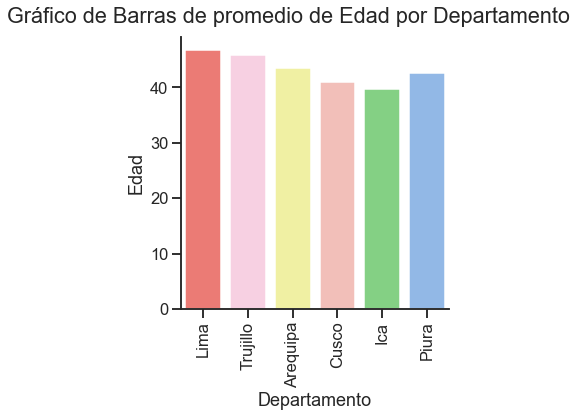

In [107]:
# Definiendo context para su ajuste de la escala
sns.set_context("talk")

# Indicando la paleta de colores a usar
sns.set_palette(paleta2)

# Realizando el gráfico correspondiente 
a=sns.catplot(x="dpto",
            y="edad",
            data=df,
            kind="bar",
            ci=None # No mostrar los intervalos de confianza
             )

# Ajustando las etiquetas de los ejes x e y 
a.set(xlabel="Departamento", ylabel="Edad")

# Colocando el título 
a.fig.suptitle("Gráfico de Barras de promedio de Edad por Departamento",y=1.03)

plt.xticks(rotation=90)

# Mostrando la gráfica
plt.show()

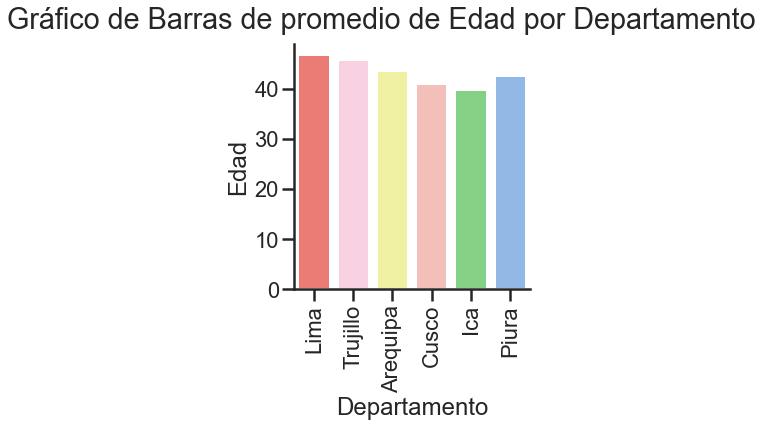

In [108]:
# Definiendo context para su ajuste de la escala
sns.set_context("poster")

# Indicando la paleta de colores a usar
sns.set_palette(paleta2)

# Realizando el gráfico correspondiente 
a=sns.catplot(x="dpto",
            y="edad",
            data=df,
            kind="bar",
            ci=None # No mostrar los intervalos de confianza
             )

# Ajustando las etiquetas de los ejes x e y 
a.set(xlabel="Departamento", ylabel="Edad")

# Colocando el título 
a.fig.suptitle("Gráfico de Barras de promedio de Edad por Departamento",y=1.03)

plt.xticks(rotation=90)

# Mostrando la gráfica
plt.show()

## Documentación y referencias: 

https://seaborn.pydata.org/ 